In [1]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np

import pandas as pd
df_test = pd.read_csv('/Users/firat/Development/Machine Learning/final/ml titanic/test.csv', header=0)
df_train = pd.read_csv('/Users/firat/Development/Machine Learning/final/ml titanic/train.csv', header=0)


X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()

print("Columns: ", df_train.columns.values)

Columns:  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### PassangerID is dropped since it is unrelevent, also we dropped survived column from train data. 
### In the below cell, we present the first five row of the data.


In [2]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Train data set length: ", len(df_train))
print("Test data set length: ", len(df_test))

Train data set length:  891
Test data set length:  418


In [4]:
print("Age, Fare details: \n-----------------------------")
print(df_train[["Age","Fare"]].describe())
print()

print("Sex, Embarked details: \n-----------------------------")
print(df_train[["Sex", "Embarked"]].describe())
print()



Age, Fare details: 
-----------------------------
              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200

Sex, Embarked details: 
-----------------------------
         Sex Embarked
count    891      889
unique     2        3
top     male        S
freq     577      644



In [5]:
pClassSurv = df_train[['Pclass', 'Survived']].groupby(["Pclass"], as_index=False).mean()
print(pClassSurv)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


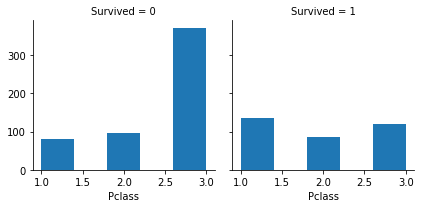

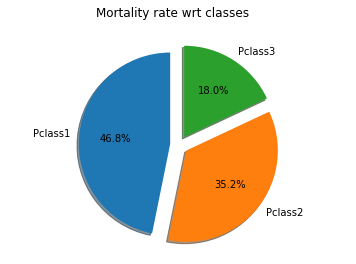

In [6]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Pclass', bins=5)

#print(pClassSurv["Survived"])

labels = 'Pclass1', 'Pclass2', 'Pclass3'
sizes = [pClassSurv["Survived"][0], pClassSurv["Survived"][1], pClassSurv["Survived"][2]]

explode = (0.1, 0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Mortality rate wrt classes")

plt.show()

## First plot shows number of survived and lost people in "passenger class".
* 3.0 represents economy class
* 2.0 represents middle class
* 1.0 represents business class 

## Pie chart shows mortality rate with respect to passenger classes.

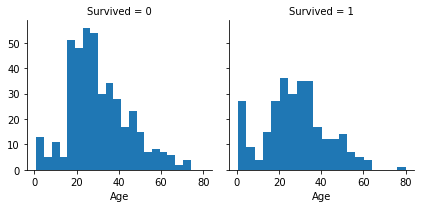

In [7]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

   Embarked  Survived
0         0  0.339009
1         1  0.553571
2         2  0.389610


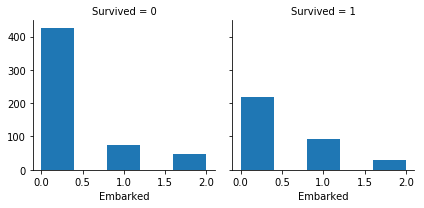

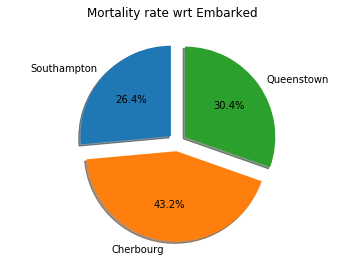

In [8]:
combine = [df_train, df_test]
freq_port = df_train.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

if combine[0]["Embarked"][0] != 0:
    for dataset in combine:
        dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    

g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Embarked', bins=5)

labels = 'Southampton', 'Cherbourg', 'Queenstown'

embarked = df_train[['Embarked', 'Survived']].groupby(["Embarked"], as_index=False).mean()
print(embarked)


sizes = [embarked["Survived"][0], embarked["Survived"][1], embarked["Survived"][2]]

explode = (0.1, 0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Mortality rate wrt Embarked")

plt.show()


## First plot shows number of survived and lost people in "passenger class".
* 3.0 represents economy class
* 2.0 represents middle class
* 1.0 represents business class 

## Pie chart shows mortality rate with respect to passenger classes.

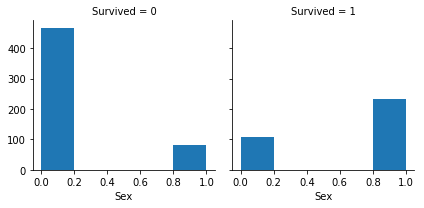

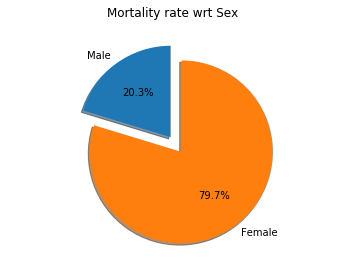

In [9]:
if combine[0]["Sex"][0] != 0:
    for dataset in combine:
        dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
        

g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Sex', bins=5)

labels = 'Male', 'Female'

sex = df_train[['Sex', 'Survived']].groupby(["Sex"], as_index=False).mean()
#print(embarked)


total = sex["Survived"][0] + sex["Survived"][1]
sizes = [sex["Survived"][0]/total, sex["Survived"][1]/total]

explode = (0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Mortality rate wrt Sex")

plt.show()

# kommant yaz


In [10]:
guess_ages = dict()

import random as rnd

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            age_mean = guess_df.mean()
            age_std = guess_df.std()
            age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            
            # round to nearest age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

if combine[0]["Age"][0] != 1:
    df_train['AgeRange'] = pd.cut(df_train['Age'], 5)
    df_train[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean()
    for dataset in combine:    
        dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
        dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
        dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
        dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
        dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]"


# açıklma... niçin rangelere böldük..? işte yeni bi kolon oluşturduk falan onları da açıklarız. head 

   Age  Survived
0    0  0.377119
1    1  0.366577
2    2  0.421569
3    3  0.434783
4    4  0.090909


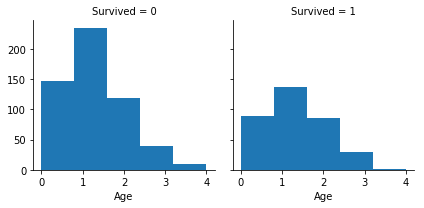

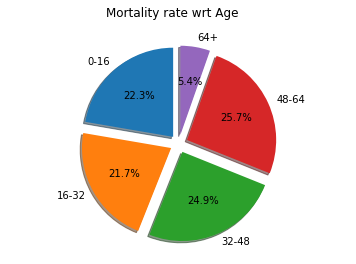

In [11]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=5)

labels = '0-16', '16-32', '32-48', '48-64', '64+'

age = df_train[['Age', 'Survived']].groupby(["Age"], as_index=False).mean()
print(age)


sizes = [age["Survived"][0], age["Survived"][1],age["Survived"][2],age["Survived"][3],age["Survived"][4]]

explode = (0.1, 0.1, 0.1, 0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Mortality rate wrt Age")

plt.show()

# buna açıklama yapılacak...

yaş aralığı ve sınıf aralığının survive ile ilişkisi gösterilebilir...


In [12]:
df_test['Fare'].fillna(df_test['Fare'].dropna().mode()[0], inplace=True)

if combine[0]["Fare"][0] != 0:
    df_train['FareRange'] = pd.qcut(df_train['Fare'], 4)
    df_train[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)
    for dataset in combine:
        dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
        dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
        dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
        dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
        dataset['Fare'] = dataset['Fare'].astype(int)

df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,"(32.0, 48.0]","(7.91, 14.454]"


# fare aralıklarının nasıl yapıldığı açıklanacak
...


   Fare  Survived
0     0  0.197309
1     1  0.308756
2     2  0.445415
3     3  0.581081


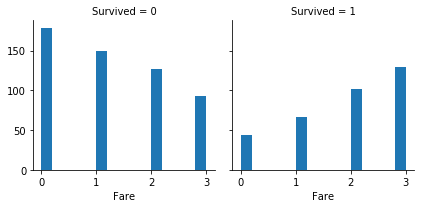

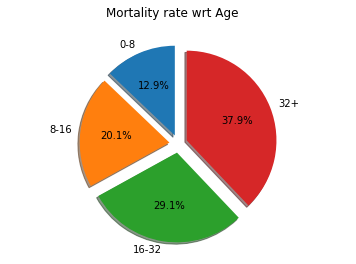

In [13]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Fare', bins=15)

labels = '0-8', '8-16', '16-32', '32+'

fare = df_train[['Fare', 'Survived']].groupby(["Fare"], as_index=False).mean()
print(fare)


sizes = [fare["Survived"][0], fare["Survived"][1],fare["Survived"][2],fare["Survived"][3]]

explode = (0.1, 0.1, 0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Mortality rate wrt Age")

plt.show()

# fakirler ölmüş açıklaması yapılacak...

In [ ]:
# title ve fare range testten silinecek

In [20]:
#df_train = df_train.drop(['FareRange'], axis=1)
#df_train = df_train.drop(['AgeRange'], axis=1)
#df_train = df_train.drop(['Name', 'PassengerId'], axis=1)
#df_test = df_test.drop(['Name'], axis=1)
#df_train = df_train.drop(['Ticket', 'Cabin'], axis=1)
#df_test = df_test.drop(['Ticket', 'Cabin'], axis=1)
#df_test = df_test.drop(['FareRange'], axis=1)





combine = [df_train, df_test]
    
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

ValueError: labels ['FareRange'] not contained in axis